## Setup

In [1]:
# Necessary imports

from datetime import datetime, timedelta
import os
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import pandas as pd
from scipy.stats import iqr
import shutil
import gdown
import zipfile

%matplotlib inline

In [2]:
start_time = datetime.now()

In [3]:
#gdown.download(url="https://drive.google.com/file/d/1PGqqp09sCKfmFE1oewx0m7I2Xdl9eu8e/view?usp=sharing", fuzzy=True)
#with zipfile.ZipFile("data_2024-02-17.zip", "r") as archive:
#    archive.extractall(".")

In [4]:
# Define useful variables
path_data = os.path.join(os.getcwd(), "data/")
print(f"path_data: {path_data}")
path_labels = os.path.join(path_data, "derivatives", "labels")
path_qc = os.path.join(path_data, "qc")
subjects = [os.path.basename(subject_path) for subject_path in sorted(glob.glob(os.path.join(path_data, "sub-*")))]
print(f"subjects: {subjects}")

# Create output folder
path_results = os.path.join(path_data, "derivatives", "results")
os.makedirs(path_results, exist_ok=True)

path_data: /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/
subjects: ['sub-MGH1', 'sub-MGH2', 'sub-MGH3', 'sub-MGH4', 'sub-MNI1', 'sub-MNI2', 'sub-MNI3', 'sub-MNI4', 'sub-NYU1', 'sub-NYU2', 'sub-NYU3']


In [8]:
# Remove SpinozaV6 for now
for subject in subjects:
    if subject[-1] == "4":
        subjects.remove(subject)
print(subjects)

['sub-MGH1', 'sub-MGH2', 'sub-MGH3', 'sub-MNI1', 'sub-MNI2', 'sub-MNI3', 'sub-NYU1', 'sub-NYU2', 'sub-NYU3']


In [9]:
## MP2RAGE segmentation

In [13]:
# Run segmentation on MP2RAGE scan

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "anat"))
    fname_manual_seg = os.path.join(path_labels, subject, "anat", f"{subject}_UNIT1-SC_seg.nii.gz")
    if os.path.exists(fname_manual_seg):
        # Manual segmentation already exists. Copy it to local folder
        print(f"{subject}: Manual segmentation found\n")
        shutil.copyfile(fname_manual_seg, f"{subject}_UNIT1_seg.nii.gz")
        # Generate QC report to make sure the manual segmentation is correct
        !sct_qc -i {subject}_UNIT1.nii.gz -s {subject}_UNIT1_seg.nii.gz -p sct_deepseg_sc -qc {path_qc} -qc-subject {subject}
    else:
        # Manual segmentation does not exist. Run automatic segmentation.
        print(f"{subject}: Manual segmentation not found")
        !sct_deepseg_sc -i "{subject}_UNIT1.nii.gz" -c t1 -qc "{path_qc}"

sub-MGH1: Manual segmentation found


--
Spinal Cord Toolbox (5.3.0)

sct_qc -i sub-MGH1_UNIT1.nii.gz -s sub-MGH1_UNIT1_seg.nii.gz -p sct_deepseg_sc -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc -qc-subject sub-MGH1
--


*** Generate Quality Control (QC) html report ***
Resample images to 0.6x0.6 mm
QcImage: layout with Axial slice
Compute center of mass at each slice
/Users/evaalonsoortiz/sct_5.3.0/python/envs/venv_sct/lib/python3.6/site-packages/scipy/ndimage/measurements.py:1391: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]
/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc/data/sub-MGH1/anat/sct_deepseg_sc/2024_02_27_092514.783214/bkg_img.png
Successfully generated the QC results in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc/_json/qc_20

sub-NYU2: Manual segmentation found


--
Spinal Cord Toolbox (5.3.0)

sct_qc -i sub-NYU2_UNIT1.nii.gz -s sub-NYU2_UNIT1_seg.nii.gz -p sct_deepseg_sc -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc -qc-subject sub-NYU2
--


*** Generate Quality Control (QC) html report ***
Resample images to 0.6x0.6 mm
QcImage: layout with Axial slice
Compute center of mass at each slice
/Users/evaalonsoortiz/sct_5.3.0/python/envs/venv_sct/lib/python3.6/site-packages/scipy/ndimage/measurements.py:1391: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]
/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc/data/sub-NYU2/anat/sct_deepseg_sc/2024_02_27_092618.018101/bkg_img.png
Successfully generated the QC results in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc/_json/qc_20

## Process fmap/TFL (flip angle maps)

In [14]:
# Register TFL flip angle maps to the MP2RAGE scan ⏳

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    !sct_register_multimodal -i {subject}_acq-anat_TB1TFL.nii.gz -d ../anat/{subject}_UNIT1.nii.gz -dseg ../anat/{subject}_UNIT1_seg.nii.gz -param step=1,type=im,algo=slicereg,metric=CC -qc "{path_qc}"


--
Spinal Cord Toolbox (5.3.0)

sct_register_multimodal -i sub-MGH1_acq-anat_TB1TFL.nii.gz -d ../anat/sub-MGH1_UNIT1.nii.gz -dseg ../anat/sub-MGH1_UNIT1_seg.nii.gz -param step=1,type=im,algo=slicereg,metric=CC -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc
--


Input parameters:
  Source .............. sub-MGH1_acq-anat_TB1TFL.nii.gz
  Destination ......... ../anat/sub-MGH1_UNIT1.nii.gz
  Init transfo ........ 
  Mask ................ 
  Output name ......... 
  Remove temp files ... 1
  Verbose ............. 1

Check if input data are 3D...
Creating temporary folder (/var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-20240227092721.402275-register-re4j2639)

Copying input data to tmp folder and convert to nii...

--
ESTIMATE TRANSFORMATION FOR STEP #0
Registration parameters:
  type ........... im
  algo ........... syn
  slicewise ...... 0
  metric ......... MI
  samplStrategy .. None
  samplPercent ... 0.2
  it


--
ESTIMATE TRANSFORMATION FOR STEP #0
Registration parameters:
  type ........... im
  algo ........... syn
  slicewise ...... 0
  metric ......... MI
  samplStrategy .. None
  samplPercent ... 0.2
  iter ........... 0
  smooth ......... 0
  laplacian ...... 0
  shrink ......... 1
  gradStep ....... 0.5
  deformation .... 1x1x0
  init ........... 
  poly ........... 5
  filter_size .... 5
  dof ............ Tx_Ty_Tz_Rx_Ry_Rz
  smoothWarpXY ... 2
  rot_method ..... pca

Estimate transformation
/Users/evaalonsoortiz/sct_5.3.0/bin/isct_antsRegistration --dimensionality 3 --transform 'syn[0.5,3,0]' --metric 'MI[dest_RPI.nii,src.nii,1,32]' --convergence 0 --shrink-factors 1 --smoothing-sigmas 0mm --restrict-deformation 1x1x0 --output '[step0,src_regStep0.nii]' --interpolation 'BSpline[3]' --verbose 1 # in /private/var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-20240227093302.030283-register-0imi55z_

--
ESTIMATE TRANSFORMATION FOR STEP #1

Apply transformation from previous step

Par


--
ESTIMATE TRANSFORMATION FOR STEP #1

Apply transformation from previous step

Parse list of warping fields...

Get dimensions of data...
  88 x 144 x 56 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_5.3.0/bin/isct_antsApplyTransforms -d 3 -i src.nii -o src_reg.nii -t warp_forward_0.nii.gz -r dest_RPI.nii -n 'BSpline[3]' # in /private/var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-20240227093933.211586-register-0dycuej4
Copy affine matrix from destination space to make sure qform/sform are the same.

Done! To view results, type:
fsleyes dest_RPI.nii src_reg.nii &

Registration parameters:
  type ........... im
  algo ........... slicereg
  slicewise ...... 0
  metric ......... CC
  samplStrategy .. None
  samplPercent ... 0.2
  iter ........... 10
  smooth ......... 0
  laplacian ...... 0
  shrink ......... 1
  gradStep ....... 0.5
  deformation .... 1x1x0
  init ........... 
  poly ........... 5
  filter_size 

/Users/evaalonsoortiz/sct_5.3.0/bin/isct_antsSliceRegularizedRegistration -t 'Translation[0.5]' -m 'CC[dest_RPI_crop.nii,src_reg_crop.nii,1,4,None,0.2]' -p 5 -i 10 -f 1 -s 0 -v 1 -o '[step1,src_reg_crop_regStep1.nii]' # in /private/var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-20240227094532.229735-register-rp5e7j2q

Concatenate transformations...
/Users/evaalonsoortiz/sct_5.3.0/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-20240227094532.229735-register-rp5e7j2q
/Users/evaalonsoortiz/sct_5.3.0/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz warp_inverse_1.nii.gz # in /private/var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-20240227094532.229735-register-rp5e7j2q

Apply transfo source --> dest...

Parse list of warping fields...

Get dimensions of data...
  88 x 144 x 56 x 1

Apply transformation...

Apply tra


Apply transfo source --> dest...

Parse list of warping fields...

Get dimensions of data...
  88 x 144 x 56 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_5.3.0/bin/isct_antsApplyTransforms -d 3 -i src.nii -o src_reg.nii -t warp_src2dest.nii.gz -r dest.nii -n Linear # in /private/var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-20240227095355.970620-register-bdc52y4z
Copy affine matrix from destination space to make sure qform/sform are the same.

Done! To view results, type:
fsleyes dest.nii src_reg.nii &


Apply transfo dest --> source...

Parse list of warping fields...

Get dimensions of data...
  242 x 192 x 368 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_5.3.0/bin/isct_antsApplyTransforms -d 3 -i dest.nii -o dest_reg.nii -t warp_dest2src.nii.gz -r src.nii -n Linear # in /private/var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-2024022709

Copy affine matrix from destination space to make sure qform/sform are the same.

Done! To view results, type:
fsleyes src.nii dest_reg.nii &


Generate output files...
File sub-MNI3_acq-anat_TB1TFL_reg.nii.gz already exists. Deleting it..
File created: sub-MNI3_acq-anat_TB1TFL_reg.nii.gz
File sub-MNI3_UNIT1_reg.nii.gz already exists. Deleting it..
File created: sub-MNI3_UNIT1_reg.nii.gz
File warp_sub-MNI3_acq-anat_TB1TFL2sub-MNI3_UNIT1.nii.gz already exists. Deleting it..
File created: warp_sub-MNI3_acq-anat_TB1TFL2sub-MNI3_UNIT1.nii.gz
File warp_sub-MNI3_UNIT12sub-MNI3_acq-anat_TB1TFL.nii.gz already exists. Deleting it..
File created: warp_sub-MNI3_UNIT12sub-MNI3_acq-anat_TB1TFL.nii.gz

Remove temporary files...
rm -rf /var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-20240227100332.028849-register-pmf49yup

Finished! Elapsed time: 593s

*** Generate Quality Control (QC) html report ***
Resample images to 0.6x0.6 mm
QcImage: layout with Axial slice
Compute center of mass at each s

Resample images to 0.6x0.6 mm
QcImage: layout with Axial slice
Compute center of mass at each slice
/Users/evaalonsoortiz/sct_5.3.0/python/envs/venv_sct/lib/python3.6/site-packages/scipy/ndimage/measurements.py:1391: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]
/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc/data/sub-NYU1/fmap/sct_register_multimodal/2024_02_27_102329.480537/bkg_img.png
Mask type float64
Successfully generated the QC results in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc/_json/qc_2024_02_27_102329.480537.json
Use the following command to see the results in a browser:
open "/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc/index.html"

Done! To view results, type:
fsleyes sub-NYU1_acq-anat_TB1TFL.nii.gz sub-NYU1_UNIT1_reg.nii.gz &


Done! To view results, type:
fsleyes sub-NYU2_acq-anat_TB1TFL.nii.gz sub-NYU2_UNIT1_reg.nii.gz &


Done! To view results, type:
fsleyes ../anat/sub-NYU2_UNIT1.nii.gz sub-NYU2_acq-anat_TB1TFL_reg.nii.gz &


--
Spinal Cord Toolbox (5.3.0)

sct_register_multimodal -i sub-NYU3_acq-anat_TB1TFL.nii.gz -d ../anat/sub-NYU3_UNIT1.nii.gz -dseg ../anat/sub-NYU3_UNIT1_seg.nii.gz -param step=1,type=im,algo=slicereg,metric=CC -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/qc
--


Input parameters:
  Source .............. sub-NYU3_acq-anat_TB1TFL.nii.gz
  Destination ......... ../anat/sub-NYU3_UNIT1.nii.gz
  Init transfo ........ 
  Mask ................ 
  Output name ......... 
  Remove temp files ... 1
  Verbose ............. 1

Check if input data are 3D...
Creating temporary folder (/var/folders/xf/n1v2pg_j2ysf0rj39ysrcm9r0000gn/T/sct-20240227103258.957779-register-99qu64g7)

Copying input data to tmp folder and convert to nii..

In [15]:
# Warping spinal cord segmentation and vertebral level to each flip angle map

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    !sct_apply_transfo -i ../anat/{subject}_UNIT1_seg.nii.gz -d {subject}_acq-anat_TB1TFL.nii.gz -w warp_{subject}_UNIT12{subject}_acq-anat_TB1TFL.nii.gz -x linear -o {subject}_acq-anat_TB1TFL_seg.nii.gz


--
Spinal Cord Toolbox (5.3.0)

sct_apply_transfo -i ../anat/sub-MGH1_UNIT1_seg.nii.gz -d sub-MGH1_acq-anat_TB1TFL.nii.gz -w warp_sub-MGH1_UNIT12sub-MGH1_acq-anat_TB1TFL.nii.gz -x linear -o sub-MGH1_acq-anat_TB1TFL_seg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  192 x 224 x 256 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_5.3.0/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-MGH1_UNIT1_seg.nii.gz -o sub-MGH1_acq-anat_TB1TFL_seg.nii.gz -t warp_sub-MGH1_UNIT12sub-MGH1_acq-anat_TB1TFL.nii.gz -r sub-MGH1_acq-anat_TB1TFL.nii.gz -n Linear # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/sub-MGH1/fmap
Copy affine matrix from destination space to make sure qform/sform are the same.

Done! To view results, type:
fsleyes sub-MGH1_acq-anat_TB1TFL.nii.gz sub-MGH1_acq-anat_TB1TFL_seg.nii.gz &


--
Spinal Cord Toolbox (5.3.0)

sct_apply


--
Spinal Cord Toolbox (5.3.0)

sct_apply_transfo -i ../anat/sub-NYU3_UNIT1_seg.nii.gz -d sub-NYU3_acq-anat_TB1TFL.nii.gz -w warp_sub-NYU3_UNIT12sub-NYU3_acq-anat_TB1TFL.nii.gz -x linear -o sub-NYU3_acq-anat_TB1TFL_seg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  240 x 192 x 368 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_5.3.0/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-NYU3_UNIT1_seg.nii.gz -o sub-NYU3_acq-anat_TB1TFL_seg.nii.gz -t warp_sub-NYU3_UNIT12sub-NYU3_acq-anat_TB1TFL.nii.gz -r sub-NYU3_acq-anat_TB1TFL.nii.gz -n Linear # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/sub-NYU3/fmap
Copy affine matrix from destination space to make sure qform/sform are the same.

Done! To view results, type:
fsleyes sub-NYU3_acq-anat_TB1TFL.nii.gz sub-NYU3_acq-anat_TB1TFL_seg.nii.gz &



In [16]:
# Convert the flip angle maps to B1+ efficiency maps [nT/V] (inspired by code from Kyle Gilbert)
# The approach consists in calculating the B1+ efficiency using a 1ms, pi-pulse at the acquisition voltage,
# then scale the efficiency by the ratio of the measured flip angle to the requested flip angle in the pulse sequence.

GAMMA = 2.675e8;  # [rad / (s T)]
requested_fa = 90  # saturation flip angle -- hard-coded in sequence

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    # Fetch the reference voltage from the JSON sidecar to the TFL B1map sequence
    with open(f"{subject}_acq-famp_TB1TFL.json", "r") as f:
        metadata = json.load(f)
        ref_voltage = metadata.get("TxRefAmp", "N/A")
        if (ref_voltage == "N/A"):
            ref_token = "N/A"
            for token in metadata.get("SeriesDescription", "N/A").split("_"):
                if token.startswith("RefV"): ref_token = token
            ref_voltage = float(ref_token[4:-1])
        print(f"ref_voltage [V]: {ref_voltage} ({subject}_acq-famp_TB1TFL)")

    # Open flip angle map with nibabel
    nii = nib.load(f"{subject}_acq-famp_TB1TFL.nii.gz")
    acquired_fa = nii.get_fdata()

    # Siemens maps are in units of flip angle * 10 (in degrees)
    acquired_fa = acquired_fa / 10

    # Account for the power loss between the coil and the socket. That number was given by Siemens.
    voltage_at_socket = ref_voltage * 10 ** -0.095

    # Compute B1 map in [T/V]
    b1_map = (acquired_fa / requested_fa) * (np.pi / (GAMMA * 1e-3 * voltage_at_socket))

    # Convert to [nT/V]
    b1_map = b1_map * 1e9

    # Save as NIfTI file
    nii_b1 = nib.Nifti1Image(b1_map, nii.affine, nii.header)
    nib.save(nii_b1, f"{subject}_TB1map.nii.gz")

ref_voltage [V]: 600 (sub-MGH1_acq-famp_TB1TFL)
ref_voltage [V]: 520 (sub-MGH2_acq-famp_TB1TFL)
ref_voltage [V]: 635.7 (sub-MGH3_acq-famp_TB1TFL)
ref_voltage [V]: 649.6 (sub-MNI1_acq-famp_TB1TFL)
ref_voltage [V]: 446.4 (sub-MNI2_acq-famp_TB1TFL)
ref_voltage [V]: 595.5 (sub-MNI3_acq-famp_TB1TFL)
ref_voltage [V]: 450.0 (sub-NYU1_acq-famp_TB1TFL)
ref_voltage [V]: 365.0 (sub-NYU2_acq-famp_TB1TFL)
ref_voltage [V]: 450.0 (sub-NYU3_acq-famp_TB1TFL)


In [17]:
# Extract B1+ value along the spinal cord between levels C3 and T2 (included)

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    fname_result_b1plus = os.path.join(path_results, f"{subject}_TB1map.csv")
    !sct_extract_metric -i {subject}_TB1map.nii.gz -f {subject}_acq-anat_TB1TFL_seg.nii.gz -method wa -perslice 1 -o "{fname_result_b1plus}"


--
Spinal Cord Toolbox (5.3.0)

sct_extract_metric -i sub-MGH1_TB1map.nii.gz -f sub-MGH1_acq-anat_TB1TFL_seg.nii.gz -method wa -perslice 1 -o /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/derivatives/results/sub-MGH1_TB1map.csv
--


Load metric image...
Estimation for label: sub-MGH1_acq-anat_TB1TFL_seg

Done! To view results, type:
open /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/derivatives/results/sub-MGH1_TB1map.csv


--
Spinal Cord Toolbox (5.3.0)

sct_extract_metric -i sub-MGH2_TB1map.nii.gz -f sub-MGH2_acq-anat_TB1TFL_seg.nii.gz -method wa -perslice 1 -o /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/notebook_outputs/data/derivatives/results/sub-MGH2_TB1map.csv
--


Load metric image...
Estimation for label: sub-MGH2_acq-anat_TB1TFL_seg

Done! To view results, type:
open /Users/evaalonsoortiz/Documents/Academi

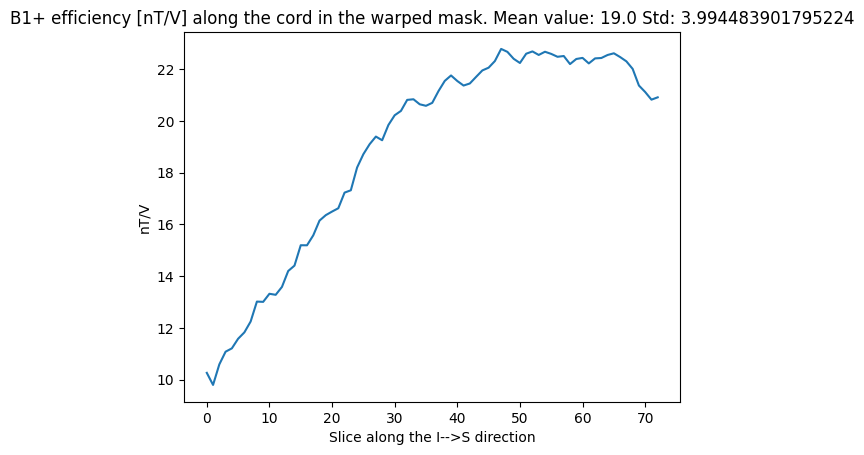

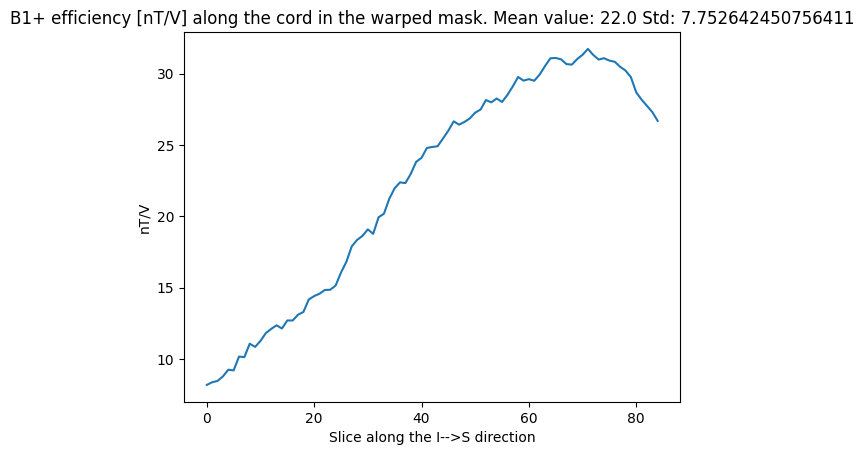

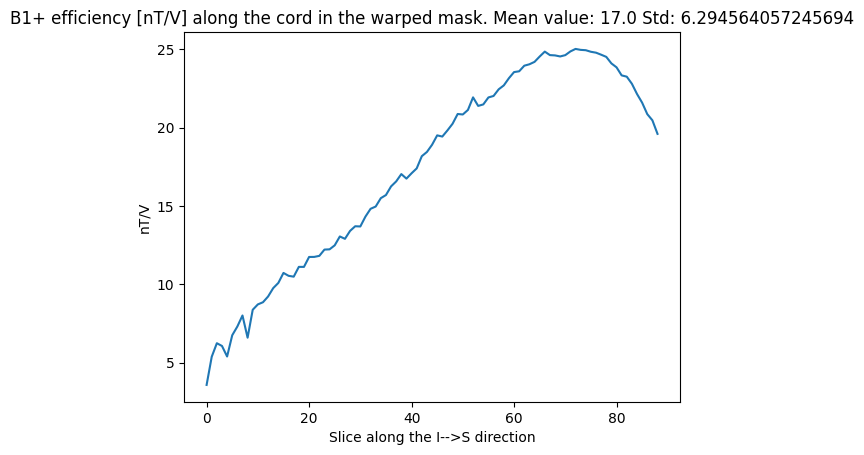

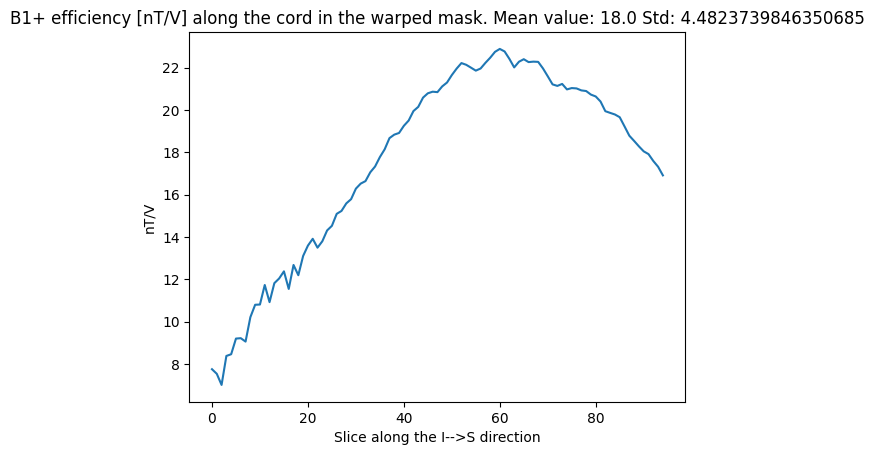

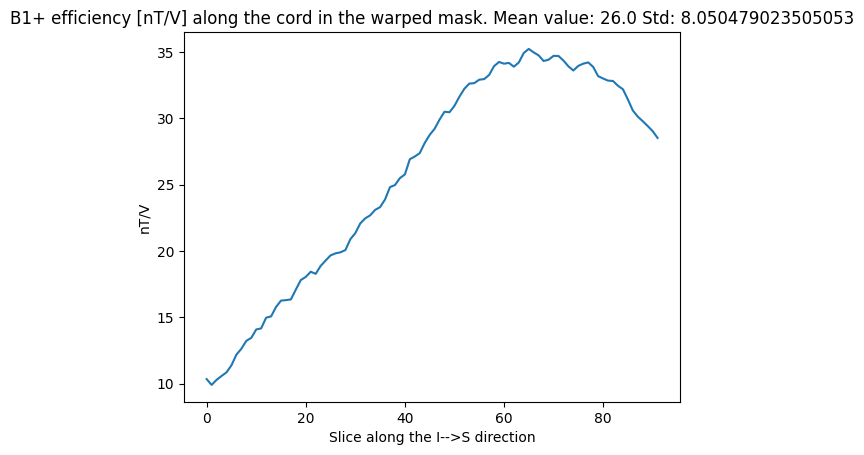

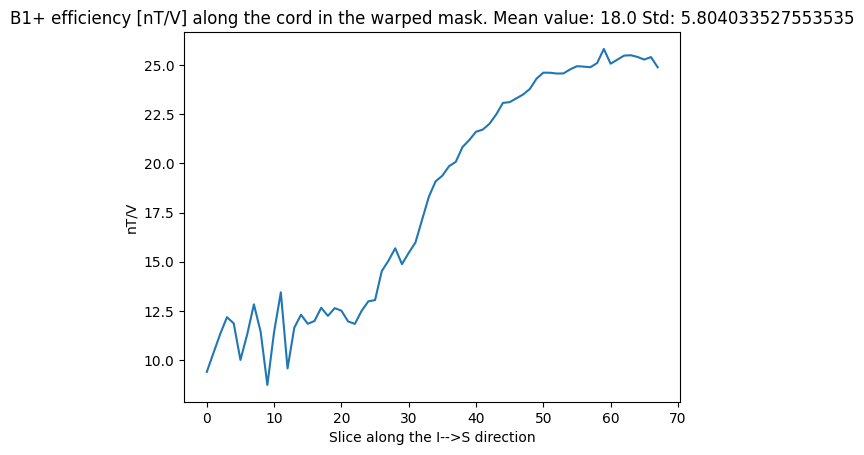

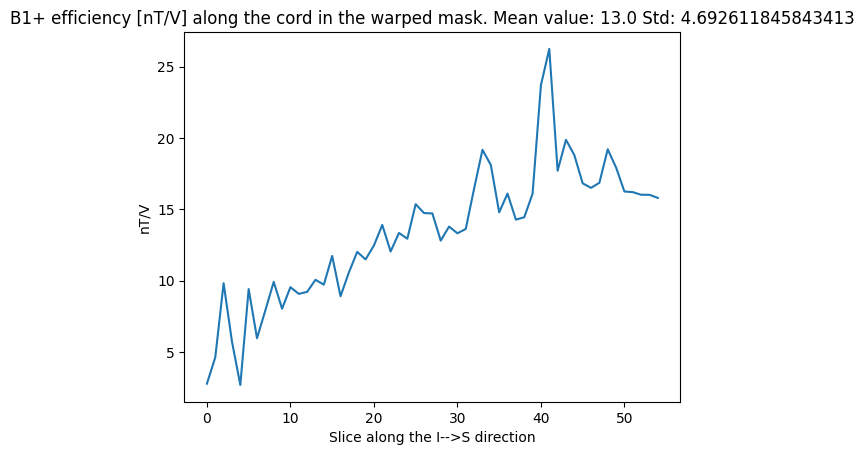

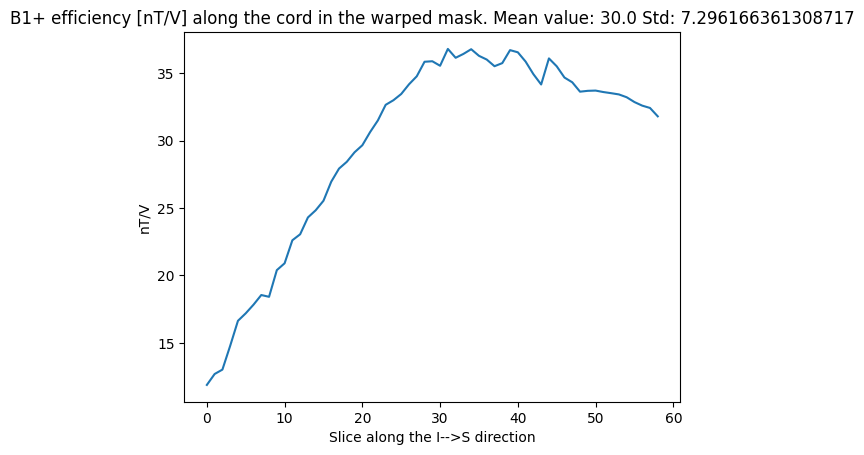

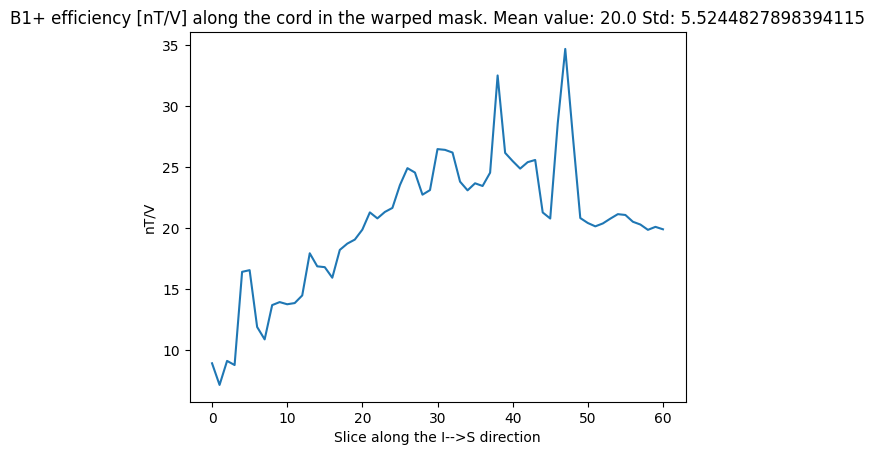

In [18]:
def signal_extractor_from_csv(csv_filename):
  # Load the CSV file into a Pandas DataFrame
  dataframe = pd.read_csv(csv_filename, index_col='Slice (I->S)')
  # Convert all the strings (123.4242, etc) of the WA column into actual numerical values
  dataframe['WA()'] = pd.to_numeric(dataframe['WA()'], errors='coerce')
  WA_matrix = dataframe['WA()'].to_numpy()
  return WA_matrix

b1_iqrs = []
TFL_B1_nTpV_along_cord_list = []

for subject in subjects:
    TFL_B1_nTpV_along_cord = signal_extractor_from_csv(os.path.join(path_results, subject + "_TB1map.csv"))
    TFL_B1_nTpV_along_cord = TFL_B1_nTpV_along_cord[~np.isnan(TFL_B1_nTpV_along_cord)] # remove NaNs
    TFL_B1_nTpV_along_cord_list.append(TFL_B1_nTpV_along_cord)
    plt.plot(TFL_B1_nTpV_along_cord)
    TFL_B1_nTpV_along_cord_mean = np.round(np.mean(TFL_B1_nTpV_along_cord))
    std = np.std(TFL_B1_nTpV_along_cord)
    titlestring= f"B1+ efficiency [nT/V] along the cord in the warped mask. Mean value: {TFL_B1_nTpV_along_cord_mean} Std: {std}"
    b1_iqrs.append(iqr(TFL_B1_nTpV_along_cord))
    plt.title(titlestring)
    plt.xlabel('Slice along the I-->S direction')
    plt.ylabel('nT/V')
    plt.show()  



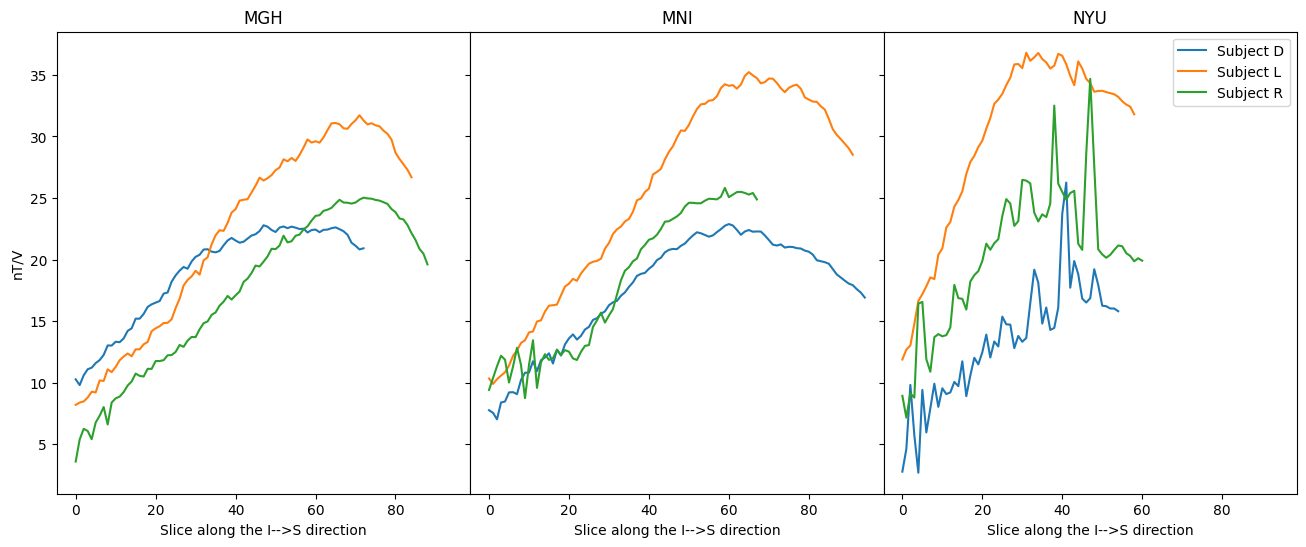

In [19]:
sites = ["MGH", "MNI", "NYU"]
subject_names = ["Subject D", "Subject L", "Subject R"]

fig = plt.figure()
gs = fig.add_gridspec(1, 3, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.set_size_inches(16, 6)

j = 0
for i in range(len(sites)): 
    axs[i].plot(TFL_B1_nTpV_along_cord_list[j])
    axs[i].plot(TFL_B1_nTpV_along_cord_list[j+1])
    axs[i].plot(TFL_B1_nTpV_along_cord_list[j+2])
    axs[i].set_title(sites[i])
    j = j + 3

axs[i].legend(subject_names,loc="upper right")


for ax in axs.flat:
    ax.set(xlabel='Slice along the I-->S direction', ylabel='nT/V')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

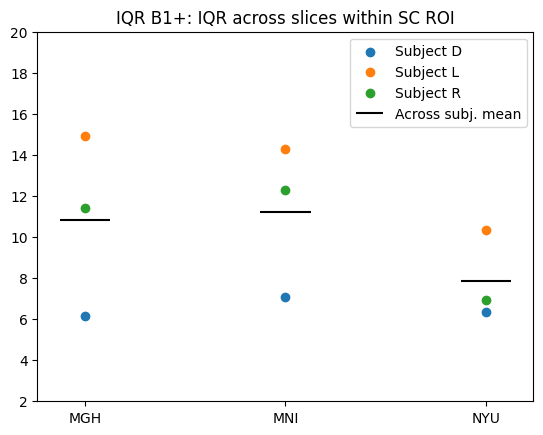

In [20]:
series = [b1_iqrs[i::3]for i in range(3)]
hline_x = np.array([0, 1, 2])
hline_width = 0.25

fig, ax = plt.subplots()
for subject_name, subject_series in zip(subject_names, series):
    ax.scatter(sites, subject_series, label=subject_name)
plt.hlines([np.mean(b1_iqrs[i:i+3]) for i in range(0, len(b1_iqrs), 3)], hline_x - hline_width/2, hline_x + hline_width/2, color="black", label="Across subj. mean")
ax.legend()
ax.set_ylim(2, 20)
ax.set_title("IQR B1+: IQR across slices within SC ROI")
plt.show()

In [21]:
# Indicate duration of data processing

end_time = datetime.now()
total_time = (end_time - start_time).total_seconds()

# Convert seconds to a timedelta object
total_time_delta = timedelta(seconds=total_time)

# Format the timedelta object to a string
formatted_time = str(total_time_delta)

# Pad the string representation if less than an hour
formatted_time = formatted_time.rjust(8, '0')

print(f"Total Runtime [hour:min:sec]: {formatted_time}")

Total Runtime [hour:min:sec]: 13:28:21.863954
